## Loading data and initializing parameters

In [1]:
import random


from utilities import display_single_level_statistics
from simulation.simulation_parameters import SimulationParameters
from simulation.simulation_statistics import SimulationStatistics
from simulation.simulation_runner import SimulationRunner
from policies.ftrl_policy import FTRLPolicy
from policies.lfu_policy import LFUPolicy
from policies.lru_policy import LRUPolicy
from policies.policy import Policy
from typing import List
from data.path import DataPath
from utilities import display_multi_level_statistics
from factories.cache_factory import get_bipartite_systems_from_datasets
from data.loaders import load_bipartite_movielens
from data.loaders import load_online_cache_trace
from factories.cache_factory import get_expert_ftpl_policy
from data.loaders import load_movielens



random.seed(42)

## Defining single cache simulations

In [2]:
def run_single_cache_simulation():
    dataset = load_movielens(DataPath.MOVIE_LENS)
    cache_size = 5
    policies: List[Policy] = [
        LRUPolicy(cache_size),
        LFUPolicy(cache_size),
        FTRLPolicy(cache_size, dataset.catalog_size, dataset.trace.size),
        get_expert_ftpl_policy(cache_size, dataset.catalog_size, dataset.trace.size)
    ]

    runner = SimulationRunner(threads=len(policies))
    parameters = SimulationParameters(dataset.trace, policies)
    statistics: List[SimulationStatistics] = runner.run_simulations(parameters)
    display_single_level_statistics(statistics)

## Define bipartite simulation

In [3]:
def run_multi_cache_simulation():
    datasets = load_bipartite_movielens(DataPath.MOVIE_LENS)
    cache_size = 50
    d_regular_degree = 2
    cache_count = 6
    systems = get_bipartite_systems_from_datasets(datasets, cache_size, d_regular_degree, cache_count)
    runner = SimulationRunner(threads=min([len(systems), 10]))
    statistics = runner.run_bipartite_simulations(systems, datasets)
    display_multi_level_statistics(statistics)

## Run single cache simulation

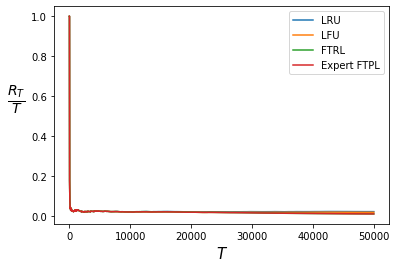

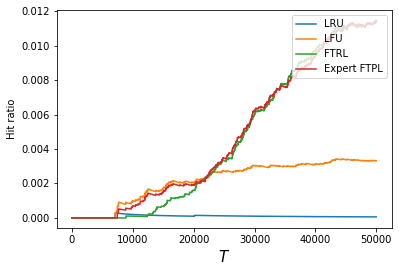

In [4]:
run_single_cache_simulation()

## Run bipartite simulation

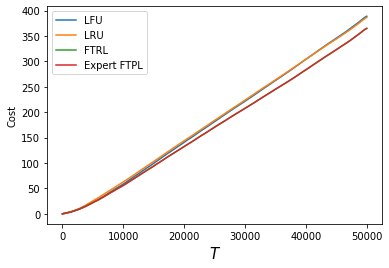

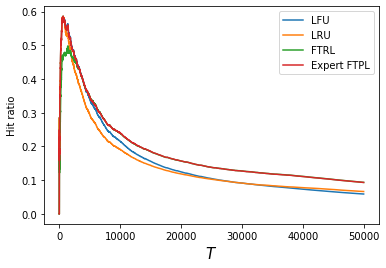

In [5]:
run_multi_cache_simulation()